# Keras customization

Minimal example of overloading Keras methods for model customization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import kerastuner as kt

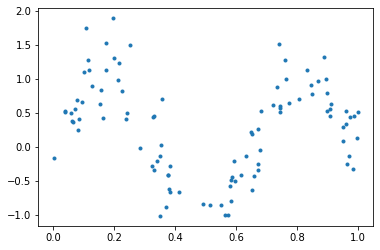

In [233]:
# Cook some simplistic data:
x = np.sort(np.random.uniform(size=100))
y = np.sin(x*3*np.pi) + np.random.normal(size=x.shape)/3
plt.plot(x,y,'.');

In [278]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)), # https://www.tensorflow.org/api_docs/python/tf/keras/Input
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mean_squared_error'])

model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 256)               512       
_________________________________________________________________
dense_109 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 257       
Total params: 66,561
Trainable params: 66,561
Non-trainable params: 0
_________________________________________________________________


In [279]:
# Custom callback(s)
# https://www.tensorflow.org/guide/keras/custom_callback

class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 20 == 0:
            print(f"{logs['loss']:0.3}", end=' ')

0.11 0.114 0.111 0.11 0.118 0.109 0.109 0.11 0.112 0.111 0.11 0.109 0.108 0.108 0.113 0.107 0.11 0.11 0.109 0.109 0.106 0.114 0.113 0.109 0.105 

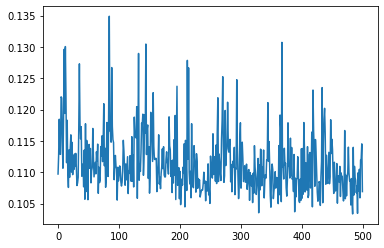

In [285]:
history = model.fit(x, y,
                    batch_size=16,
                    epochs=500,
                    verbose=0,
                    callbacks=[CustomCallbacks()]
                    #, validation_data=(x, y)
                   )

plt.plot(history.history['loss']);

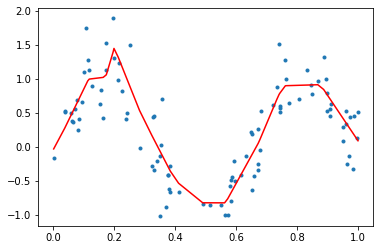

In [286]:
y_new = model.predict(x)
plt.plot(x,y, '.');
plt.plot(x, y_new, 'r-');